# Case Study II: A JAMA Paper on Cholesterol
We look at a paper that appeared in the Journal of the American Medical Association and explore how to use R to confirm the results. 


## Overview of the Paper

The paper we examine is by Carroll et al. [Carroll2005] The goal is to confirm the results and explore some of the other results not explicitly addressed in the paper. This paper received a great deal of attention in the media. A partial list of some of the articles is given below, but many of them are now defunct:
    
    FOX News
    www.medpagetoday.com
    Argus Leader
    The Globe and Mail

The authors examine the trends of several studies of cholesterol levels of Americans. The studies have been conducted in 1960-1962, 1988-1994, 1976-1980, 1988-1994, and 1999-2002. Studies of the studies previous to 1999 have indicated that overall cholesterol levels are declining. The authors of this paper focus on the changes between the two latest studies, 1988-1994 and 1999-2002. They concluded that between certain populations cholesterol levels have decreased over this time.

One of the things that received a great deal of attention is the linkage the authors drew between lowered cholesterol levels and increased use of new drugs to lower cholesterol. Here is a quote from their conclusions:

The increase in the proportion of adults using lipid-lowering medication, particularly in older age groups, likely contributed to the decreases in total and LDL cholesterol levels observed.

Here we focus on the confirming the results listed in Tables 3 and 4 of the paper. We confirm the p-values given in the paper and then calculate the power of the test to detect a prescribed difference in cholesterol levels.


## The Tables

Links to the tables in the paper are given below. Links are given to verbatim copies of the tables. For each table there are two links. The first is to a text file displaying the table. The second is to a csv file to be loaded into R. It is assumed that you have downloaded each of the csv files and made them available.

Links to the Tables in the paper:

    Table 1 	text 1 	csv 1
    Table 2 	text 2 	csv 2
    Table 3 	text 3 	csv 3
    Table 4 	text 4 	csv 4
    Table 5 	text 5 	csv 5
    Table 6 	text 6 	csv 6


## Confirming the p-values in Table 3

The first thing we do is confirm the p-values. The paper does not explicitly state the hypothesis test, but they use a two-sided test as we shall soon see. We will explicitly define the hypothesis test that the authors are using but first need to define some terms. We need the means for the 1988-1994 and the 1999-2002 studies and will denote them M88 and M99 respectively. We also need the standard errors and will denote them SE88 and SE99 respectively.

In this situation we are trying to compare the means of two experiments and do not have matched pairs. With this in mind we can define our hypothesis test:

\begin{split}H_0: M_{88} - M_{99} & = & 0,\end{split}
\begin{split}H_a: M_{88} - M_{99} & \neq & 0,\end{split}

When we assume that the hypothesis test we calculate the p-values using the following values:

\begin{split}Sample Mean = M_{88} - M_{99}\end{split},

\begin{split}SE = \sqrt{SE_{88}^2 + SE_{99}^2}\end{split}.

Note that the standard errors are given in the data, and we do not have to use the number of observations to calculate the standard error. However, we do need the number of observations in calculating the p-value. The authors used a t test. There are complicated formulas used to calculate the degrees of freedom for the comparison of two means, but here we will simply find the minimum of the set of observations and subtract one.

We first need to read in the data from table3.csv and will call the new variable t3. Note that we use a new option, row.names=”group”. This option tells R to use the entries in the “group” column as the row names. Once the table has been read we will need to make use of the means in the 1988-1994 study (t3\$M.88) and the sample means in the 1999-2002 study (t3\$M.99). We will also have to make use of the corresponding standard errors (t3\$SE.88 and t3\$SE.99) and the number of observations (t3\$N.88 and t3\$N.99).



In [1]:
t3 <- read.csv(file="table3.csv",header=TRUE,sep=",",row.names="group")
row.names(t3)

[1] "all"    "g20"    "men"    "mg20"   "m20-29" "m30-39" "m40-49" "m50-59"
 [9] "m60-74" "m75"    "women"  "wg20"   "w20-29" "w30-39" "w40-49" "w50-59"
[17] "w60-74" "w75"

In [2]:
names(t3)

[1] "N.60"  "M.60"  "SE.60" "N.71"  "M.71"  "SE.71" "N.76"  "M.76"  "SE.76"
[10] "N.88"  "M.88"  "SE.88" "N.99"  "M.99"  "SE.99" "p"

In [3]:
t3$M.88

[1] 204 206 204 204 180 201 211 216 214 205 205 207 183 189 204 228 235 231

In [4]:
t3$M.99

[1] 203 203 203 202 183 200 212 215 204 195 202 204 183 194 203 216 223 217

In [5]:
diff <- t3$M.88-t3$M.99
diff

[1]  1  3  1  2 -3  1 -1  1 10 10  3  3  0 -5  1 12 12 14

In [6]:
se <- sqrt(t3$SE.88^2+t3$SE.99^2)
se

[1] 1.140175 1.063015 1.500000 1.500000 2.195450 2.193171 3.361547 3.041381
 [9] 2.193171 3.328663 1.131371 1.063015 2.140093 1.984943 2.126029 2.483948
[17] 2.126029 2.860070

In [7]:
deg <- pmin(t3$N.88,t3$N.99)-1
deg

[1] 7739 8808 3648 4164  673  672  759  570  970  515 4090 4643  960  860  753
[16]  568  945  552

We can now calculate the t statistic. From the null hypothesis, the assumed mean of the difference is zero. We can then use the pt command to get the p-values.

In [9]:
t <- diff/se
t

[1]  0.8770580  2.8221626  0.6666667  1.3333333 -1.3664626  0.4559608
 [7] -0.2974821  0.3287980  4.5596075  3.0042088  2.6516504  2.8221626
[13]  0.0000000 -2.5189636  0.4703604  4.8310181  5.6443252  4.8949852

In [10]:
pt(t,df=deg)

[1] 0.809758825 0.997609607 0.747486382 0.908752313 0.086125089 0.675717245
 [7] 0.383089952 0.628785421 0.999997110 0.998603837 0.995979577 0.997604809
[13] 0.500000000 0.005975203 0.680883135 0.999999125 0.999999989 0.999999354

There are two problems with the calculation above. First, some of the t-values are positive, and for positive values we need the area under the curve to the right. There are a couple of ways to fix this, and here we will insure that the t scores are negative by taking the negative of the absolute value. The second problem is that this is a two-sided test, and we have to multiply the probability by two:

In [11]:
pt(-abs(t),df=deg)

[1] 1.902412e-01 2.390393e-03 2.525136e-01 9.124769e-02 8.612509e-02
 [6] 3.242828e-01 3.830900e-01 3.712146e-01 2.889894e-06 1.396163e-03
[11] 4.020423e-03 2.395191e-03 5.000000e-01 5.975203e-03 3.191169e-01
[16] 8.748656e-07 1.095966e-08 6.462814e-07

In [12]:
2*pt(-abs(t),df=deg)

[1] 3.804823e-01 4.780786e-03 5.050272e-01 1.824954e-01 1.722502e-01
 [6] 6.485655e-01 7.661799e-01 7.424292e-01 5.779788e-06 2.792326e-03
[11] 8.040845e-03 4.790382e-03 1.000000e+00 1.195041e-02 6.382337e-01
[16] 1.749731e-06 2.191933e-08 1.292563e-06

These numbers are a close match to the values given in the paper, but the output above is hard to read. We introduce a new command to loop through and print out the results in a format that is easier to read. The for loop allows you to repeat a command a specified number of times. Here we want to go from 1, 2, 3, ..., to the end of the list of p-values and print out the group and associated p-value:

In [13]:
p <- 2*pt(-abs(t),df=deg)
for (j in 1:length(p)) {
     cat("p-value for ",row.names(t3)[j]," ",p[j],"\n");
}

p-value for  all   0.3804823 
p-value for  g20   0.004780786 
p-value for  men   0.5050272 
p-value for  mg20   0.1824954 
p-value for  m20-29   0.1722502 
p-value for  m30-39   0.6485655 
p-value for  m40-49   0.7661799 
p-value for  m50-59   0.7424292 
p-value for  m60-74   5.779788e-06 
p-value for  m75   0.002792326 
p-value for  women   0.008040845 
p-value for  wg20   0.004790382 
p-value for  w20-29   1 
p-value for  w30-39   0.01195041 
p-value for  w40-49   0.6382337 
p-value for  w50-59   1.749731e-06 
p-value for  w60-74   2.191933e-08 
p-value for  w75   1.292563e-06 


We can now compare this to Table 3 and see that we have good agreement. The differences come from a round off errors from using the truncated data in the article as well as using a different method to calculate the degrees of freedom. Note that for p-values close to zero the percent errors are very large.

It is interesting to note that among the categories (rows) given in the table, only a small number of the differences have a p-value small enough to reject the null hypothesis at the 95% level. The differences with a p-value less than 5% are the group of all people, men from 60 to 74, men greater than 74, women from 20-74, all women, and women from the age groups of 30-39, 50-59, 60-74, and greater than 74.

The p-values for nine out of the eighteen categories are low enough to allow us to reject the associated null hypothesis. One of those categories is for all people in the study, but very few of the male categories have significant differences at the 95% level. The majority of the differences are in the female categories especially the older age brackets.

## Confirming the p-values in Table 4

We now confirm the p-values given in Table 4. The level of detail in the previous section is not given, rather the commands are briefly given below:

In [14]:
t4 <- read.csv(file="table4.csv",header=TRUE,sep=",",row.names="group")
names(t4)

[1] "S88N"  "S88M"  "S88SE" "S99N"  "S99M"  "S99SE" "p"

In [15]:
diff <- t4$S88M - t4$S99M
se <- sqrt(t4$S88SE^2+t4$S99SE^2)
deg <- pmin(t4$S88N,t4$S99N)-1
t <- diff/se
p <- 2*pt(-abs(t),df=deg)
for (j in 1:length(p)) {
     cat("p-values for ",row.names(t4)[j]," ",p[j],"\n");
}

p-values for  MA   0.07724362 
p-values for  MAM   0.6592499 
p-values for  MAW   0.002497728 
p-values for  NHW   0.1184228 
p-values for  NHWM   0.2673851 
p-values for  NHWW   0.02585374 
p-values for  NHB   0.001963195 
p-values for  NHBM   0.003442551 
p-values for  NHBW   0.007932079 


Again, the p-values are close to those given in Table 4. The numbers are off due to truncation errors from the true data as well as a simplified calculation of the degrees of freedom. As in the previous section the p-values that are close to zero have the greatest percent errors.
## Finding the Power of the Test in Table 3

We now will find the power of the test to detect a difference. Here we arbitrarily choose to find the power to detect a difference of 4 points and then do the same for a difference of 6 points. The first step is to assume that the null hypothesis is true and find the 95% confidence interval around a difference of zero:

In [16]:
t3 <- read.csv(file="table3.csv",header=TRUE,sep=",",row.names="group")
se <- sqrt(t3$SE.88^2+t3$SE.99^2)
deg <- pmin(t3$N.88,t3$N.99)-1
tcut <- qt(0.975,df=deg)
tcut

[1] 1.960271 1.960233 1.960614 1.960534 1.963495 1.963500 1.963094 1.964135
 [9] 1.962413 1.964581 1.960544 1.960475 1.962438 1.962726 1.963119 1.964149
[17] 1.962477 1.964271

Now that the cutoff t-scores for the 95% confidence interval have been established we want to find the probability of making a type II error. We find the probability of making a type II error if the difference is a positive 4.

In [17]:
typeII <- pt(tcut,df=deg,ncp=4/se)-pt(-tcut,df=deg,ncp=4/se)
typeII
1-typeII

[1] 0.06083127 0.03573266 0.24009202 0.24006497 0.55583392 0.55508927
 [7] 0.77898598 0.74064782 0.55477307 0.77573784 0.05765826 0.03576160
[13] 0.53688674 0.47884787 0.53218625 0.63753092 0.53199248 0.71316969

[1] 0.9391687 0.9642673 0.7599080 0.7599350 0.4441661 0.4449107 0.2210140
 [8] 0.2593522 0.4452269 0.2242622 0.9423417 0.9642384 0.4631133 0.5211521
[15] 0.4678138 0.3624691 0.4680075 0.2868303

It looks like there is a mix here. Some of the tests have a very high power while others are poor. Six of the categories have very high power and four have powers less than 30% . One problem is that this is hard to read. We now show how to use the for loop to create a nicer output:

In [18]:
power <- 1-typeII
for (j in 1:length(power)) {
     cat("power for ",row.names(t3)[j]," ",power[j],"\n");
 }

power for  all   0.9391687 
power for  g20   0.9642673 
power for  men   0.759908 
power for  mg20   0.759935 
power for  m20-29   0.4441661 
power for  m30-39   0.4449107 
power for  m40-49   0.221014 
power for  m50-59   0.2593522 
power for  m60-74   0.4452269 
power for  m75   0.2242622 
power for  women   0.9423417 
power for  wg20   0.9642384 
power for  w20-29   0.4631133 
power for  w30-39   0.5211521 
power for  w40-49   0.4678138 
power for  w50-59   0.3624691 
power for  w60-74   0.4680075 
power for  w75   0.2868303 


We see that the composite groups, groups made up of larger age groups, have much higher powers than the age stratified groups. It also appears that the groups composed of women seem to have higher powers as well.
## Differences by Race in Table 2

We now look at the differences in the rows of LDL cholesterol in Table 2. Table 2 lists the cholesterol levels broken down by race. Here the p-values are calculated for the means for the totals rather than for every entry in the table. We will use the same two-sided hypothesis test as above, the null hypothesis is that there is no difference between the means.

Since we are comparing means from a subset of the entries and across rows we cannot simply copy the commands from above. We will first read the data from the files and then separate the first, fourth, seventh, and tenth rows:

In [19]:
t1 <- read.csv(file='table1.csv',head=TRUE,sep=',',row.name="Group")
t1

,Total,HDL,LDL,STG
AllG20,8809,8808,3867,3982
MG20,4165,4164,1815,1893
WG20,4644,4644,2052,2089
AMA,2122,2122,950,994
AMA-M,998,998,439,467
AMA-F,1124,1124,511,527
ANHW,4338,4337,1938,1997
ANHW-M,2091,2090,924,965
ANHW-F,2247,2247,1014,1032
ANHB,1602,1602,670,674


In [20]:
t2 <- read.csv(file='table2.csv',head=T,sep=',',row.name="group")
ldlM  <- c(t2$LDL[1],t2$LDL[4],t2$LDL[7],t2$LDL[10])
ldlSE <- c(t2$LDLSE[1],t2$LDLSE[4],t2$LDLSE[7],t2$LDLSE[10])
ldlN  <- c(t1$LDL[1],t1$LDL[4],t1$LDL[7],t1$LDL[10])
ldlNames  <- c(row.names(t1)[1],row.names(t1)[4],row.names(t1)[7],row.names(t1)[10])
ldlM
ldlSE

ldlN

ldlNames

[1] 123 121 124 121

[1] 1.0 1.3 1.2 1.6

[1] 3867  950 1938  670

[1] "AllG20" "AMA"    "ANHW"   "ANHB"

We can now find the approximate p-values. This is not the same as the previous examples because the means are not being compared across matching values of different lists but down the rows of a single list. We will make use of two for loops. The idea is that we will loop though each row except the last row. Then for each of these rows we make a comparison for every row beneath:

In [21]:
for (j in 1:(length(ldlM)-1)) {
    for (k in (j+1):length(ldlM)) {
       diff <- ldlM[j]-ldlM[k]
       se <- sqrt(ldlSE[j]^2+ldlSE[k]^2)
       t <- diff/se
       n <- min(ldlN[j],ldlN[k])-1
       p <- 2*pt(-abs(t),df=n)
       cat("(",j,",",k,") - ",ldlNames[j]," vs ",ldlNames[k]," p: ",p,"\n")
       }
  }

( 1 , 2 ) -  AllG20  vs  AMA  p:  0.2229872 
( 1 , 3 ) -  AllG20  vs  ANHW  p:  0.5221284 
( 1 , 4 ) -  AllG20  vs  ANHB  p:  0.2895281 
( 2 , 3 ) -  AMA  vs  ANHW  p:  0.09027066 
( 2 , 4 ) -  AMA  vs  ANHB  p:  1 
( 3 , 4 ) -  ANHW  vs  ANHB  p:  0.1340862 


We cannot reject the null hypothesis at the 95% level for any of the differences. We cannot say that there is a significant difference between any of the groups in this comparison.

## Summary

We examined some of the results stated in the paper Trends in Serum Lipids and Lipoproteins of Adults, 1960-2002 and confirmed the stated p-values for Tables 3 and 4. We also found the p-values for differences by some of the race categories in Table 2.

When checking the p-values for Table 3 we found that nine of the eighteen differences are significant. When looking at the boxplot (below) for the means from Table 3 we see that two of those (the means for the two oldest categories for women) are outliers.



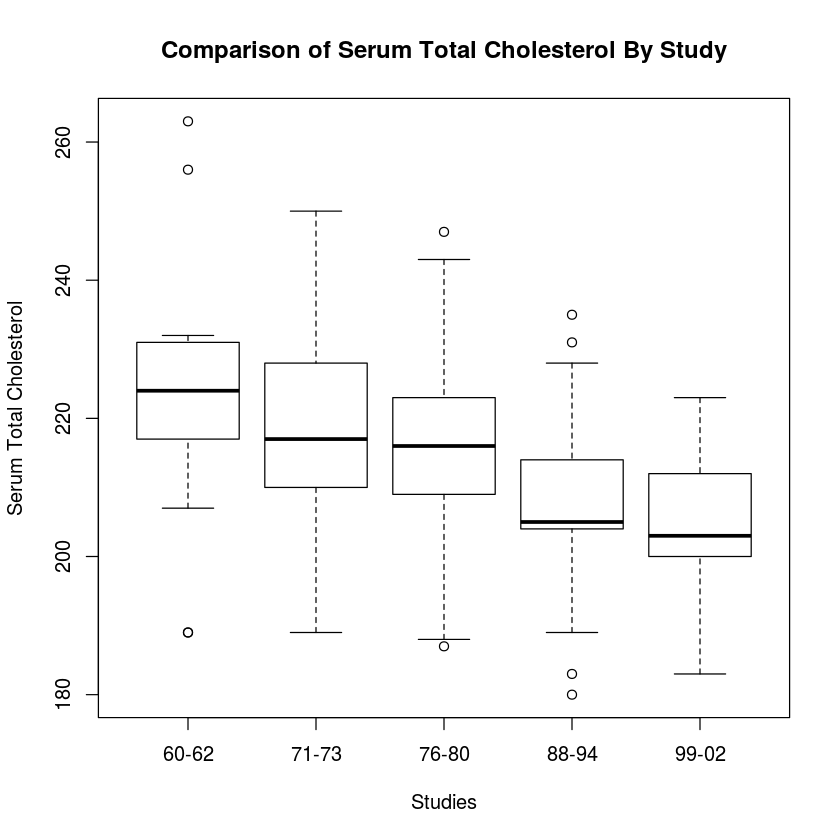

In [22]:
boxplot(t3$M.60,t3$M.71,t3$M.76,t3$M.88,t3$M.99,
          names=c("60-62","71-73","76-80","88-94","99-02"),
          xlab="Studies",ylab="Serum Total Cholesterol",
          main="Comparison of Serum Total Cholesterol By Study")

The boxplot helps demonstrate what was found in the comparisons of the previous studies. There has been long term declines in cholesterol levels over the whole term of these studies. The new wrinkle in this study is the association of the use of statins to reduce blood serum cholesterol levels. The results given in Table 6 show that every category of people has shown a significant increase in the use of statins.

One question for discussion is whether or not the association demonstrates strong enough evidence to claim a causative link between the two. The news articles that were published in response to the article imply causation between the use of statins and lower cholesterol levels. However, the study only demonstrates a positive association, and the decline in cholesterol levels may be a long term phenomena with interactions between a wide range of factors.